<a href="https://colab.research.google.com/github/RP-7/ComputerScience_Research_PaperML/blob/main/CS_EE_support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

**Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Dataset**

In [ ]:
dataset = pd.read_csv('CS_EE_Dataset.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values

print(x)
print(y)

[[ 890]
 [1080]
 [1250]
 [1450]
 [1850]
 [2640]
 [3105]
 [2960]
 [2801]
 [2634]
 [2862]
 [2967]
 [3144]
 [3522]
 [4865]]
[[45.31]
 [41.35]
 [43.51]
 [48.41]
 [45.73]
 [46.67]
 [53.44]
 [56.57]
 [62.33]
 [62.97]
 [66.46]
 [67.79]
 [70.09]
 [70.39]
 [76.38]]


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)
print(x)
print(y)

[[-1.60323299]
 [-1.41801961]
 [-1.25230238]
 [-1.05734093]
 [-0.66741803]
 [ 0.1026797 ]
 [ 0.55596507]
 [ 0.41461802]
 [ 0.25962366]
 [ 0.09683085]
 [ 0.31908691]
 [ 0.42144167]
 [ 0.59398255]
 [ 0.96245969]
 [ 2.27162583]]
[[-1.05856096]
 [-1.41230792]
 [-1.21935503]
 [-0.78163784]
 [-1.02104235]
 [-0.93707211]
 [-0.33230775]
 [-0.05270472]
 [ 0.4618363 ]
 [ 0.51900753]
 [ 0.83076936]
 [ 0.94957831]
 [ 1.1550374 ]
 [ 1.18183642]
 [ 1.71692335]]


**Training the SVR model with dataset**

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

**Testing with prediction**

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[700]])).reshape(-1,1))
sc_y.inverse_transform(regressor.predict(sc_x.transform([[4872]])).reshape(-1,1))
#the input is taken and transfored to feature sclaed data feature scaleing is used for scaled which outputs the result in reversed feauted scale method for better understanding, the reshape helps eliminating the formatting error

array([[72.72283584]])

**Visualising**

<function matplotlib.pyplot.show(close=None, block=None)>

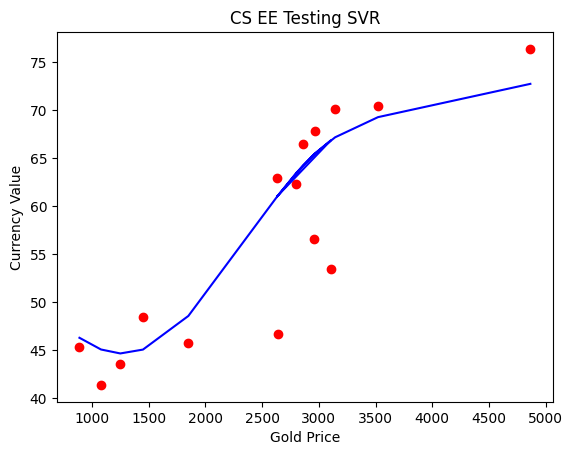

In [ ]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color = 'blue')
plt.title('CS EE Testing SVR')
plt.xlabel('Gold Price')
plt.ylabel('Currency Value')
plt.show

**Higher resolution and smooth curve**

<function matplotlib.pyplot.show(close=None, block=None)>

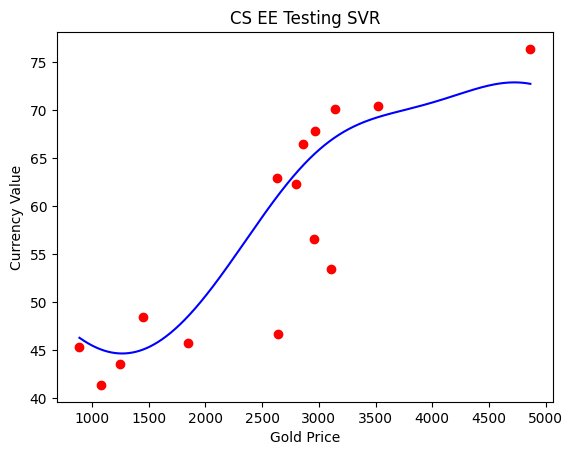

In [ ]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color = 'red')
plt.plot(x_grid,sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)),color = 'blue')
plt.title('CS EE Testing SVR')
plt.xlabel('Gold Price')
plt.ylabel('Currency Value')
plt.show